In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import trange
import random

In [ ]:
path3 = "/Users/choeseung-won/Deep_Study/cj_project/2021년 미래기술 챌린지_211005/1. 이커머스 FC주문 데이터/1-1. 이커머스 FC주문 데이터_3월.csv"
path4 = "/Users/choeseung-won/Deep_Study/cj_project/2021년 미래기술 챌린지_211005/1. 이커머스 FC주문 데이터/1-2. 이커머스 FC주문 데이터_4월.csv"
path5 = "/Users/choeseung-won/Deep_Study/cj_project/2021년 미래기술 챌린지_211005/1. 이커머스 FC주문 데이터/1-3. 이커머스 FC주문 데이터_5월.csv"
path6 = "/Users/choeseung-won/Deep_Study/cj_project/2021년 미래기술 챌린지_211005/1. 이커머스 FC주문 데이터/1-4. 이커머스 FC주문 데이터_6월.csv"

Error: Session cannot generate requests

In [87]:
df = pd.read_excel(path3, sheet_name='워크시트 익스포트')
df4 = pd.read_excel(path4, sheet_name='워크시트 익스포트')
df5 = pd.read_excel(path5, sheet_name='워크시트 익스포트')
df6 = pd.read_excel(path6, sheet_name='워크시트 익스포트')

df = pd.concat([df, df4,  df5, df6])

df

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,16,00281,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676908,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,17,00316,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676909,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,18,00338,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
676910,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,19,00183,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN


In [88]:

def makedata(df):
    df['BKG_DATE'] = df['BKG_DATE'].astype(str)
    df['BKG_DATE_TimeStamp']=pd.to_datetime(df['BKG_DATE'])
    df["Year"] = df["BKG_DATE_TimeStamp"].dt.year
    df["Month"] = df["BKG_DATE_TimeStamp"].dt.month
    df["Day"] = df["BKG_DATE_TimeStamp"].dt.day
    df["Day_of_week"] = df["BKG_DATE_TimeStamp"].dt.day_name()

    df['SHPR_CD'] = df['SHPR_CD'].astype(str)


    return df

df = makedata(df)

In [ ]:
## 보류 for item2vec

# def makeDataToTimeseries(df):
#     timeseries_df = pd.DataFrame()
#     timeseries_df['Date'] = df.BKG_DATE.unique()

#     timeseries_df['ItmeCount'] = timeseries_df.Date.map(lambda x: len(df.query(f' BKG_DATE == "{x}"').ITEM_CD.unique()))
#     timeseries_df['MallCount'] = timeseries_df.Date.map(lambda x: len(df.query(f' BKG_DATE == "{x}"').SHPR_CD.unique()))

#     timeseries_df['TotalCount'] = timeseries_df.Date.map(lambda x: df.query(f' BKG_DATE == "{x}"').shape[0])

#     timeseries_df = timeseries_df.set_index('Date').dropna()
    
#     return timeseries_df

# timeseries_df = makeDataToTimeseries(df)

In [89]:
timeseries_df = pd.DataFrame()
timeseries_df['Date'] = df.BKG_DATE.unique()
timeseries_df['Date_for_day'] = pd.to_datetime(df.BKG_DATE.unique())
timeseries_df['TotalCount'] = timeseries_df.Date.map(lambda x: df.query(f' BKG_DATE == "{x}"').shape[0])
timeseries_df['Day_of_week'] = timeseries_df['Date_for_day'].dt.day_name()


timeseries_df = pd.get_dummies(timeseries_df,prefix='', prefix_sep='', columns=['Day_of_week'])
timeseries_df = timeseries_df.drop(columns='Date_for_day')
timeseries_df

,Date,TotalCount,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,20210303,13756,0,0,0,0,0,0,1
1,20210302,11912,0,0,0,0,0,1,0
2,20210301,8536,0,1,0,0,0,0,0
3,20210304,10330,0,0,0,0,1,0,0
4,20210305,12929,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
117,20210624,17777,0,0,0,0,1,0,0
118,20210626,16404,0,0,1,0,0,0,0
119,20210627,20792,0,0,0,1,0,0,0
120,20210625,18206,1,0,0,0,0,0,0


In [90]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


timeseries_df["TotalCount"] = min_max_scaler.fit_transform(timeseries_df["TotalCount"].to_numpy().reshape(-1,1))
timeseries_df

,Date,TotalCount,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,20210303,0.222168,0,0,0,0,0,0,1
1,20210302,0.175225,0,0,0,0,0,1,0
2,20210301,0.089280,0,1,0,0,0,0,0
3,20210304,0.134951,0,0,0,0,1,0,0
4,20210305,0.201115,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
117,20210624,0.324533,0,0,0,0,1,0,0
118,20210626,0.289580,0,0,1,0,0,0,0
119,20210627,0.401288,0,0,0,1,0,0,0
120,20210625,0.335455,1,0,0,0,0,0,0


In [91]:
train = timeseries_df[:-7]
train = train.iloc[:,1 ].to_numpy()

test = timeseries_df[-7:]
test = test.iloc[:,1].to_numpy()


train.shape, test.shape

((115,), (7,))

In [92]:
from torch.utils.data import DataLoader, Dataset

class windowDataset(Dataset):
    def __init__(self, y, input_window, output_window, stride=1):
        #총 데이터의 개수
        L = y.shape[0]
        #stride씩 움직일 때 생기는 총 sample의 개수
        num_samples = (L - input_window - output_window) // stride + 1

        #input과 output : shape = (window 크기, sample 개수)
        X = np.zeros([input_window, num_samples])
        Y = np.zeros([output_window, num_samples])

        for i in np.arange(num_samples):
            start_x = stride*i
            end_x = start_x + input_window
            X[:,i] = y[start_x:end_x]

            start_y = stride*i + input_window
            end_y = start_y + output_window
            Y[:,i] = y[start_y:end_y]

        X = X.reshape(X.shape[0], X.shape[1], 1).transpose((1,0,2))
        Y = Y.reshape(Y.shape[0], Y.shape[1], 1).transpose((1,0,2))
        self.x = X
        self.y = Y
        
        self.len = len(X)
    def __getitem__(self, i):
        return self.x[i], self.y[i]
    def __len__(self):
        return self.len

In [93]:
iw = 14
ow = 7

train_dataset = windowDataset(train, input_window=iw, output_window=ow, stride=1)
train_loader = DataLoader(train_dataset, batch_size=64)

In [94]:
import torch
import torch.nn as nn

class lstm_encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers = 1):
        super(lstm_encoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first=True)

    def forward(self, x_input):
        lstm_out, self.hidden = self.lstm(x_input)
        return lstm_out, self.hidden

In [95]:
class lstm_decoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers = 1):
        super(lstm_decoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size,num_layers = num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, input_size)           

    def forward(self, x_input, encoder_hidden_states):
        lstm_out, self.hidden = self.lstm(x_input.unsqueeze(-1), encoder_hidden_states)
        output = self.linear(lstm_out)
        
        return output, self.hidden

In [96]:
class lstm_encoder_decoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(lstm_encoder_decoder, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size

        self.encoder = lstm_encoder(input_size = input_size, hidden_size = hidden_size)
        self.decoder = lstm_decoder(input_size = input_size, hidden_size = hidden_size)

    def forward(self, inputs, targets, target_len, teacher_forcing_ratio):
        batch_size = inputs.shape[0]
        input_size = inputs.shape[2]

        outputs = torch.zeros(batch_size, target_len, input_size)

        _, hidden = self.encoder(inputs)
        decoder_input = inputs[:,-1, :]
        
        #원하는 길이가 될 때까지 decoder를 실행한다.
        for t in range(target_len): 
            out, hidden = self.decoder(decoder_input, hidden)
            out =  out.squeeze(1)
            
            # teacher forcing을 구현한다.
            # teacher forcing에 해당하면 다음 인풋값으로는 예측한 값이 아니라 실제 값을 사용한다.
            if random.random() < teacher_forcing_ratio:
                decoder_input = targets[:, t, :]
            else:
                decoder_input = out
            outputs[:,t,:] = out

        return outputs
	
    # 편의성을 위해 예측해주는 함수도 생성한다.
    def predict(self, inputs, target_len):
        self.eval()
        inputs = inputs.unsqueeze(0)
        batch_size = inputs.shape[0]
        input_size = inputs.shape[2]
        outputs = torch.zeros(batch_size, target_len, input_size)
        _, hidden = self.encoder(inputs)
        decoder_input = inputs[:,-1, :]
        for t in range(target_len): 
            out, hidden = self.decoder(decoder_input, hidden)
            out =  out.squeeze(1)
            decoder_input = out
            outputs[:,t,:] = out
        return outputs.detach().numpy()[0,:,0]

In [97]:
model = lstm_encoder_decoder(input_size=1, hidden_size=16)

In [98]:
learning_rate=0.01
epoch = 3000
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

In [99]:
from tqdm import tqdm

model.train()
with tqdm(range(epoch)) as tr:
    for i in tr:
        total_loss = 0.0
        for x,y in train_loader:
            optimizer.zero_grad()
            x = x.float()
            y = y.float()
            output = model(x, y, ow, 0.6)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.cpu().item()
        tr.set_postfix(loss="{0:.5f}".format(total_loss/len(train_loader)))

100%|██████████| 3000/3000 [00:48<00:00, 61.50it/s, loss=0.00002]


In [124]:
predict = model.predict(torch.tensor(real[-7*5:-7*3]).reshape(-1,1).float(), target_len=ow)
real = timeseries_df["TotalCount"].to_numpy()

predict = min_max_scaler.inverse_transform(predict.reshape(-1,1))
real = min_max_scaler.inverse_transform(real.reshape(-1,1))

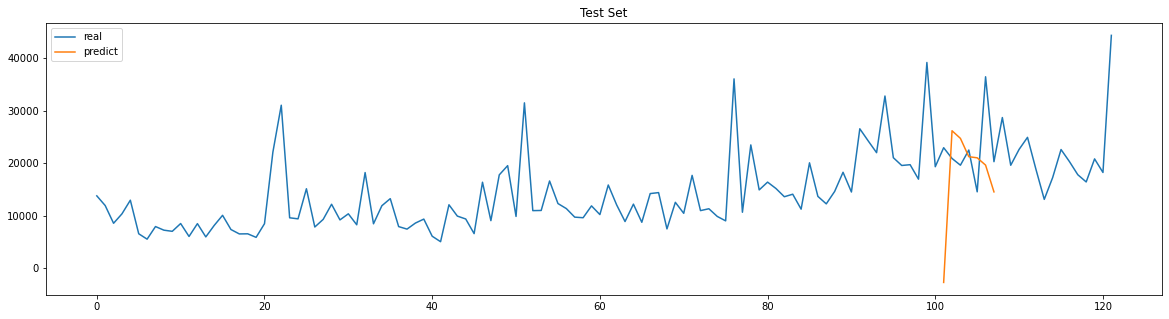

In [135]:
plt.figure(figsize=(20,5))
plt.plot(range(0,122), real[0:], label="real")
plt.plot(range(122-21,122-14), predict[-7:], label="predict")

plt.title("Test Set")
plt.legend()
plt.show()

In [130]:
predict[-7:]

array([[-2728.8726],
       [26147.832 ],
       [24696.6   ],
       [21207.498 ],
       [20997.27  ],
       [19607.219 ],
       [14510.263 ]], dtype=float32)

In [110]:
def MAPEval(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPEval(predict[-14:],real[-14:-7])

38.4382527088288